# Projet de ML : Prediction de l'abonnement d'un client

#### Dataset importation

In [18]:
import pandas as pd
data = pd.read_csv('bank-full.csv', sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### Data Exploration (EDA)

#### •	Initial Data Inspection:

In [38]:
import pandas as pd

data = pd.read_csv('bank-full.csv', sep=';')
# Remplacer "unknown" par NaN
data.replace('unknown', pd.NA, inplace=True)
# Dimensions du dataset
print("Dimensions des données : ", data.shape)

# Types de données
print("\nTypes de données :")
print(data.dtypes)

# Valeurs nulles
print("\nValeurs manquantes :")
print(data.isnull().sum())

# Duplicates
print("\nNombre de doublons : ", data.duplicated().sum())

# Aperçu des premières lignes
print("\nAperçu des données :")
print(data.head())

Dimensions des données :  (45211, 17)

Types de données :
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Valeurs manquantes :
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

Nombre de doublons :  0

Aperçu des données :
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  seco

#### •	Descriptive Statistics:

In [5]:
# Statistiques descriptives pour les variables numériques
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calcul des statistiques de base
print("\nStatistiques descriptives :")
print(data[numerical_cols].describe())

# Calcul de la variance
print("\nVariance des variables numériques :")
print(data[numerical_cols].var())

# Calcul de la skewness (asymétrie)
print("\nSkewness des variables numériques :")
print(data[numerical_cols].skew())

# Calcul de la kurtosis (aplatissement)
print("\nKurtosis des variables numériques :")
print(data[numerical_cols].kurt())


Statistiques descriptives :
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000 

#### Visualisation :

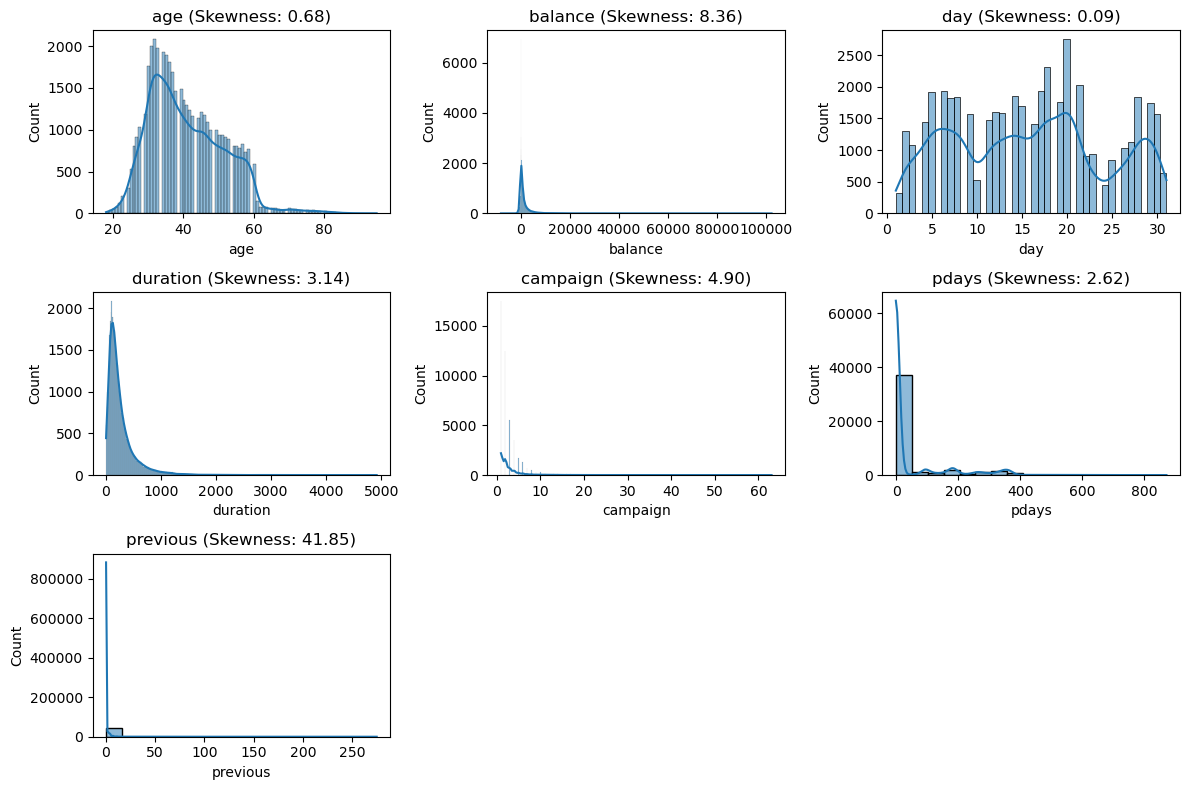

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Définir une taille de figure globale
plt.figure(figsize=(12, 8))

# Créer des histogrammes avec KDE pour chaque variable numérique
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Afficher l'histogramme et calculer la skewness
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Disposition de la grille (3x3)
    sns.histplot(data[col], kde=True)  # Histogramme avec KDE
    plt.title(f'{col} (Skewness: {skew(data[col]):.2f})')
    plt.tight_layout()

# Afficher les graphiques
plt.show()

#### Outliers Detection :

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Détection d'outliers par la méthode IQR
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).sum(axis=0)  # Nombre d'outliers par variable
print(f"Nombre d'outliers par variable (IQR) : \n{outliers_iqr}")

Nombre d'outliers par variable (IQR) : 
age          487
balance     4729
day            0
duration    3235
campaign    3064
pdays       8257
previous    8257
dtype: int64


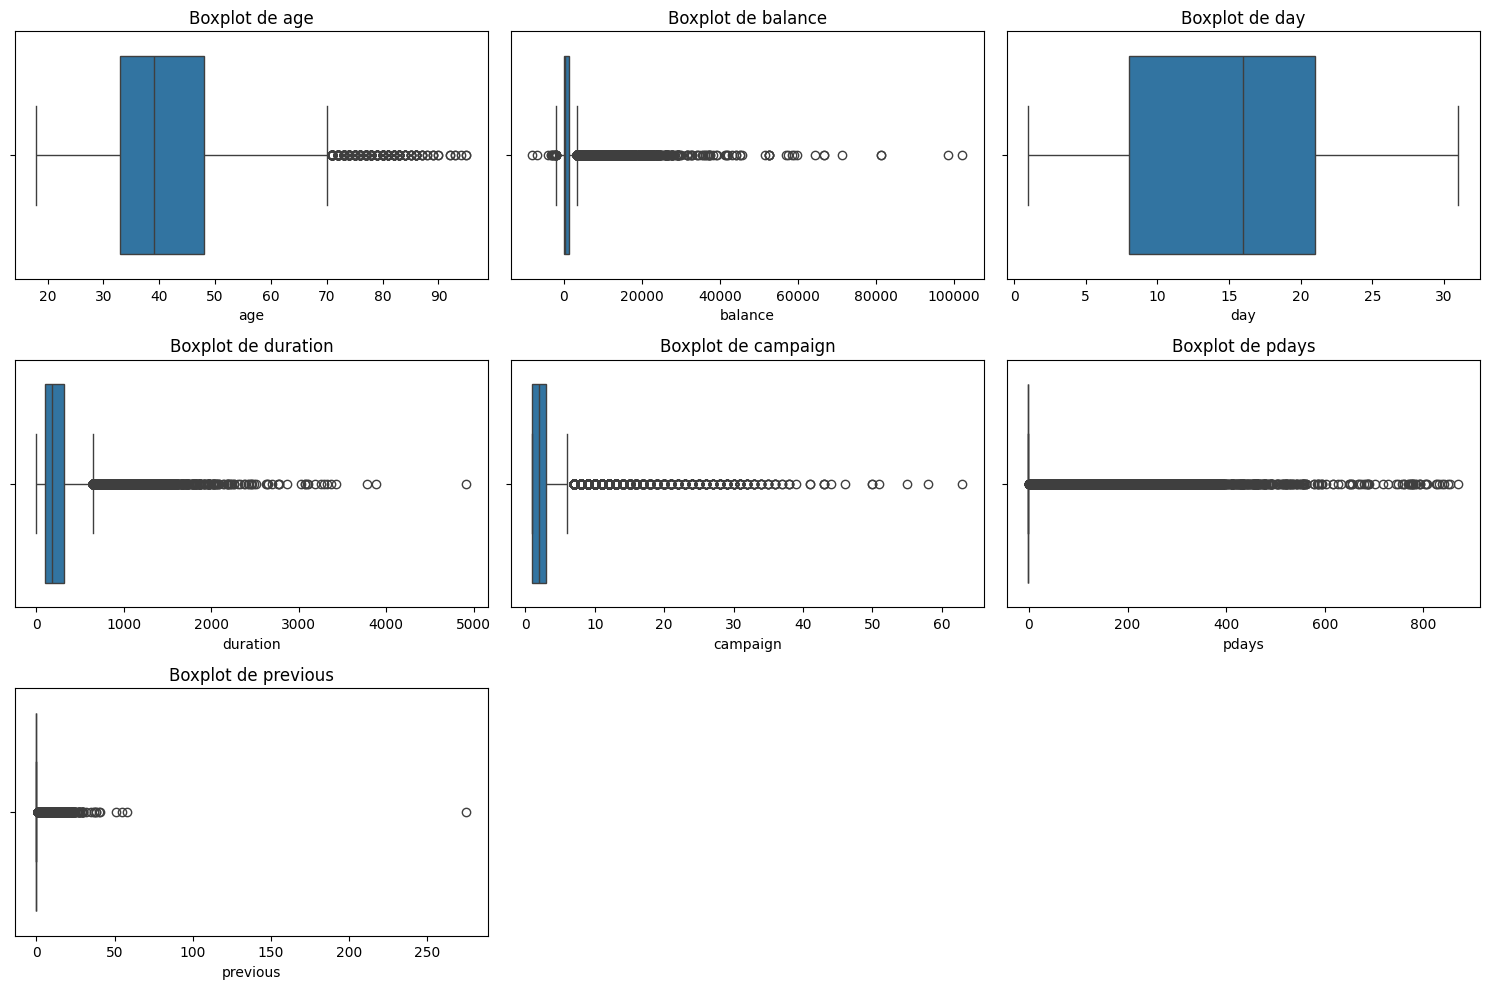

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes numériques du dataset
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Créer un boxplot pour chaque variable numérique
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Disposition en grille (3x3), ajustez en fonction du nombre de colonnes
    sns.boxplot(x=data[col])  # Tracer le boxplot pour chaque colonne
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()


#### Data Preprocessing :

####  1. Gestion des valeurs manquantes

In [11]:
# Remplir les valeurs manquantes pour les variables numériques avec la médiane
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())  # Remplissage sans inplace

# Remplir les valeurs manquantes pour les variables catégorielles avec la valeur la plus fréquente
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0]) 

#### Vérification :

In [13]:
missing_values_after = data.isnull().sum()
print("\nValeurs manquantes aprè/s traitement :")
print(missing_values_after)


Valeurs manquantes aprè/s traitement :
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [15]:
# 2. Suppression des doublons
data = data.drop_duplicates() 

#### Feature Scaling

#### Normalisation :

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Création de l'objet MinMaxScaler
scaler_minmax = MinMaxScaler()

# Appliquer le Min-Max Scaling sur les colonnes numériques
data[numerical_cols] = scaler_minmax.fit_transform(data[numerical_cols])

# Vérifier l'échelle des données après Min-Max Scaling
print("Données après Min-Max Scaling :")
print(data[numerical_cols].describe())

Données après Min-Max Scaling :
                age       balance           day      duration      campaign  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.297873      0.085171      0.493547      0.052494      0.028449   
std        0.137906      0.027643      0.277416      0.052364      0.049968   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.194805      0.073457      0.233333      0.020943      0.000000   
50%        0.272727      0.076871      0.500000      0.036600      0.016129   
75%        0.389610      0.085768      0.666667      0.064864      0.032258   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean       0.047245      0.002110  
std        0.114827      0.008376  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75% 

####  Feature Engineering

#### Transformation de la colonne month :

In [18]:
# Conversion des mois en valeurs numériques
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
data['month'] = data['month'].map(month_map)

# Créer une nouvelle variable représentant la saison à partir du mois
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['season'] = data['month'].apply(get_season)


#### Variables basées sur le solde bancaire (balance)

In [19]:
# Créer une variable binaire pour les clients avec un solde bancaire positif
data['positive_balance'] = (data['balance'] > 0).astype(int)

# Créer une variable catégorielle pour les clients à faible/moyenne/haut solde
balance_bins = [-float('inf'), 0, 1000, 5000, float('inf')]
balance_labels = ['negative', 'low', 'medium', 'high']
data['balance_category'] = pd.cut(data['balance'], bins=balance_bins, labels=balance_labels)

#### Feature Engineering basé sur l'état de souscription à un dépôt (y)

In [18]:
#on a Créer une variable y binaire 'subscribed' pour le modèle
data['subscribed'] = (data['y'] == 'yes').astype(int)

#### Feature Selection 

#### Chi-square method 

In [20]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Assurez-vous que 'y' est encodée correctement
# Par exemple, convertir la variable cible 'y' en valeurs binaires (0 pour 'no' et 1 pour 'yes')
data['y'] = data['y'].map({'no': 0, 'yes': 1})

# Sélectionner les caractéristiques catégorielles
categorical_columns = data.select_dtypes(include=['object']).columns

# Appliquer pd.get_dummies pour encoder les variables catégorielles
X = pd.get_dummies(data[categorical_columns], drop_first=True)

# La variable cible
y = data['y']

# Appliquer le test du Chi-carré
chi2_selector = SelectKBest(chi2, k='all')  # 'all' pour évaluer toutes les caractéristiques
chi2_selector.fit(X, y)

# Afficher les résultats du test du Chi-carré (valeurs p)
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi-squared': chi2_selector.scores_,
    'p-value': chi2_selector.pvalues_
})

# Trier les résultats par la valeur du Chi-carré
chi2_results = chi2_results.sort_values(by='Chi-squared', ascending=False)

# Afficher les résultats
print(chi2_results)


                Feature  Chi-squared       p-value
19     poutcome_success  4113.000571  0.000000e+00
15          housing_yes   388.949715  1.401285e-86
4           job_retired   269.699331  1.319590e-60
7           job_student   261.792961  6.977480e-59
0       job_blue-collar   178.793082  8.890872e-41
16             loan_yes   176.516137  2.793375e-40
13   education_tertiary   140.894501  1.696725e-32
11       marital_single   130.835717  2.689699e-30
22        season_Winter    76.779842  1.911184e-18
10      marital_married    65.352757  6.262225e-16
21        season_Summer    47.525507  5.429288e-12
18       poutcome_other    44.287113  2.835768e-11
3        job_management    38.743601  4.832919e-10
20        season_Spring    37.872380  7.552699e-10
6          job_services    31.876642  1.642809e-08
14          default_yes    22.313875  2.315277e-06
12  education_secondary    20.351110  6.445569e-06
9        job_unemployed    18.254702  1.932483e-05
1      job_entrepreneur    16.9

## Algorithms Application :  

## 1.Regression Logistic

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Encoder les variables catégorielles
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])  # 'y' est la variable cible (1 = souscrit, 0 = n'a pas souscrit)

# Séparer les variables indépendantes (X) et la variable dépendante (y)
X = data.drop('y', axis=1)
y = data['y']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)

# Diviser le dataset en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### Créer un pipeline de prétraitement et de modélisation

##### Ici, on applique le StandardScaler sur les variables numériques et OneHotEncoder sur les variables catégorielles (si elles existent après le pré-traitement)


In [22]:
# Créer un préprocesseur avec StandardScaler et OneHotEncoder (si nécessaire)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(drop='first'), X.select_dtypes(include=['object']).columns)
    ])

# Créer un pipeline avec prétraitement et un modèle Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])


In [24]:
# Entraîner le modèle
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index([], dtype='object'))])),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [26]:
# Faire des prédictions
y_pred = pipeline.predict(X_test)


In [28]:
# Convertir les prédictions en labels lisibles
predictions = ["Souscrit" if pred == 1 else "N'a pas souscrit" for pred in y_pred]

# Afficher les résultats pour chaque client
results = pd.DataFrame({
    'ID_Client': X_test.index,  # Utiliser l'index des données de test comme identifiant du client
    'Prediction': predictions
})

# Afficher les résultats
print(results.head(20))

    ID_Client        Prediction
0        3776  N'a pas souscrit
1        9928  N'a pas souscrit
2       33409  N'a pas souscrit
3       31885  N'a pas souscrit
4       15738  N'a pas souscrit
5       30813  N'a pas souscrit
6       35463  N'a pas souscrit
7       31382  N'a pas souscrit
8       16904  N'a pas souscrit
9       11930  N'a pas souscrit
10      34145  N'a pas souscrit
11      37828  N'a pas souscrit
12       1866  N'a pas souscrit
13      31271  N'a pas souscrit
14      30574  N'a pas souscrit
15      41828  N'a pas souscrit
16      37181  N'a pas souscrit
17      39042  N'a pas souscrit
18       5548  N'a pas souscrit
19      34197  N'a pas souscrit


#### Visualisation des Prédictions (Souscription ou Non)

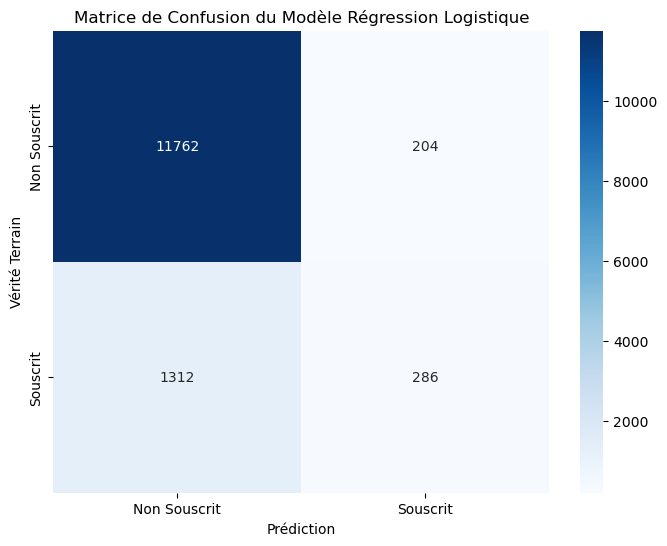

In [133]:
# Calculer la matrice de confusion
cm_logreg = confusion_matrix(y_test, y_pred)

# Visualiser la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Souscrit', 'Souscrit'], yticklabels=['Non Souscrit', 'Souscrit'])
plt.title('Matrice de Confusion du Modèle Régression Logistique')
plt.xlabel('Prédiction')
plt.ylabel('Vérité Terrain')
plt.show()


In [135]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.58      0.18      0.27      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564



### validation croisée

In [31]:
from sklearn.model_selection import cross_val_score

# Créer un pipeline avec prétraitement et un modèle Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Effectuer la validation croisée sur les données
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Afficher les résultats de la validation croisée
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')


Cross-validation scores: [0.90136017 0.89504534 0.8892944  0.86761778 0.86407874]
Mean cross-validation score: 0.88


### 2. KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Créer un pipeline avec prétraitement et un modèle KNN
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # Vous pouvez ajuster n_neighbors selon vos besoins
])

In [34]:
# Diviser le dataset en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
# Entraîner le modèle KNN sur les données d'entraînement
pipeline_knn.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index([], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [19]:
# Faire des prédictions sur les données de test
y_pred_knn = pipeline_knn.predict(X_test)


In [33]:
#cross validation knn
cv_scores_knn = cross_val_score(pipeline_knn, X, y, cv=5, scoring='accuracy')

# Afficher les résultats de la validation croisée
print(f'Cross-validation scores for KNN: {cv_scores_knn}')
print(f'Mean cross-validation score for KNN: {cv_scores_knn.mean():.2f}')

Cross-validation scores for KNN: [0.88499392 0.87878788 0.8849812  0.83488166 0.78710462]
Mean cross-validation score for KNN: 0.85


In [23]:
# Afficher les résultats pour chaque client
predictions_knn = ["Souscrit" if pred == 1 else "N'a pas souscrit" for pred in y_pred_knn]

# Créer un DataFrame avec les résultats
results_knn = pd.DataFrame({
    'ID_Client': X_test.index,  # Utiliser l'index des données de test comme identifiant du client
    'Prediction': predictions_knn
})


# Afficher les résultats
print("Prédictions du modèle KNN :")
print(results_knn.head(20))

Prédictions du modèle KNN :
    ID_Client        Prediction
0        3776  N'a pas souscrit
1        9928  N'a pas souscrit
2       33409  N'a pas souscrit
3       31885  N'a pas souscrit
4       15738  N'a pas souscrit
5       30813  N'a pas souscrit
6       35463  N'a pas souscrit
7       31382  N'a pas souscrit
8       16904  N'a pas souscrit
9       11930  N'a pas souscrit
10      34145  N'a pas souscrit
11      37828  N'a pas souscrit
12       1866  N'a pas souscrit
13      31271  N'a pas souscrit
14      30574  N'a pas souscrit
15      41828          Souscrit
16      37181  N'a pas souscrit
17      39042  N'a pas souscrit
18       5548  N'a pas souscrit
19      34197  N'a pas souscrit


In [37]:
# Évaluer le modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn:.2f}')

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     11966
           1       0.52      0.30      0.38      1598

    accuracy                           0.88     13564
   macro avg       0.72      0.63      0.66     13564
weighted avg       0.87      0.88      0.87     13564



#### Visualisation avec un diagramme a barre

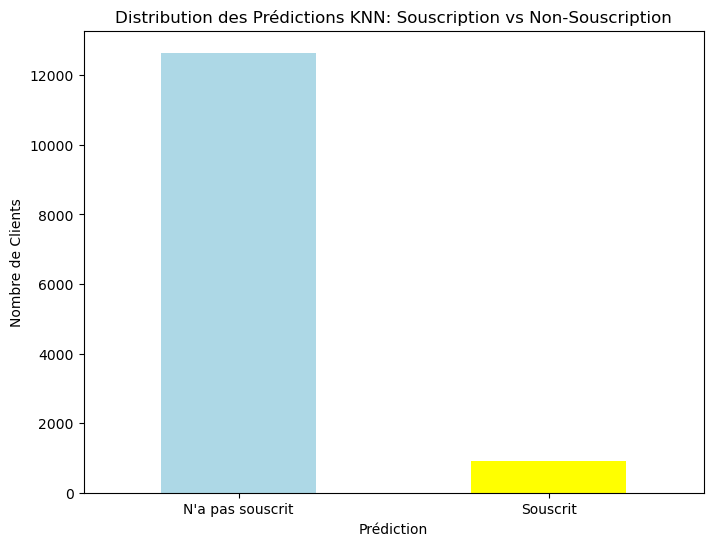

In [25]:
import matplotlib.pyplot as plt

# Compter les prédictions "Souscrit" et "N'a pas souscrit"
prediction_counts = results_knn['Prediction'].value_counts()

# Visualisation avec un diagramme à barres
plt.figure(figsize=(8, 6))
prediction_counts.plot(kind='bar', color=['lightblue', 'yellow'])
plt.title('Distribution des Prédictions KNN: Souscription vs Non-Souscription')
plt.xlabel('Prédiction')
plt.ylabel('Nombre de Clients')
plt.xticks(rotation=0)
plt.show()

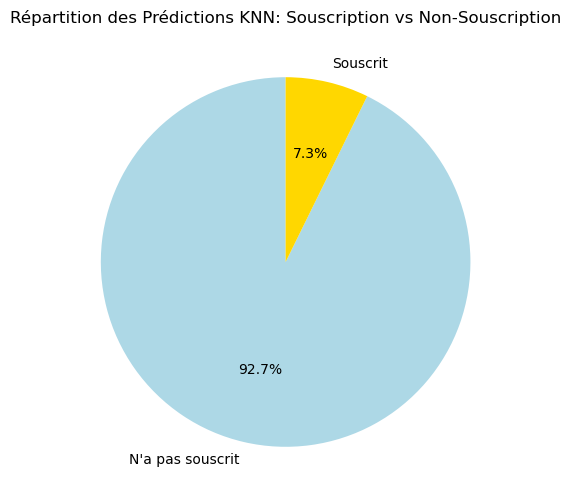

In [94]:
# pour le diagramme circulaire
plt.figure(figsize=(8, 6))
prediction_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'gold'], startangle=90)
plt.title('Répartition des Prédictions KNN: Souscription vs Non-Souscription')
plt.ylabel('')  # Enlever le label 'y'
plt.show()

#### Matrice de confusion

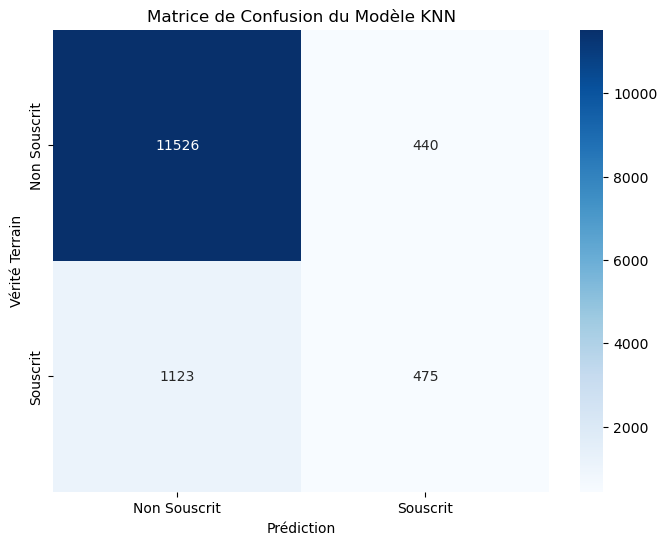

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_knn)

# Visualiser la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Souscrit', 'Souscrit'], yticklabels=['Non Souscrit', 'Souscrit'])
plt.title('Matrice de Confusion du Modèle KNN')
plt.xlabel('Prédiction')
plt.ylabel('Vérité Terrain')
plt.show()


### 3.Arbre de décision

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Créer un modèle d'arbre de décision
model_dt = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle avec les données d'entraînement
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

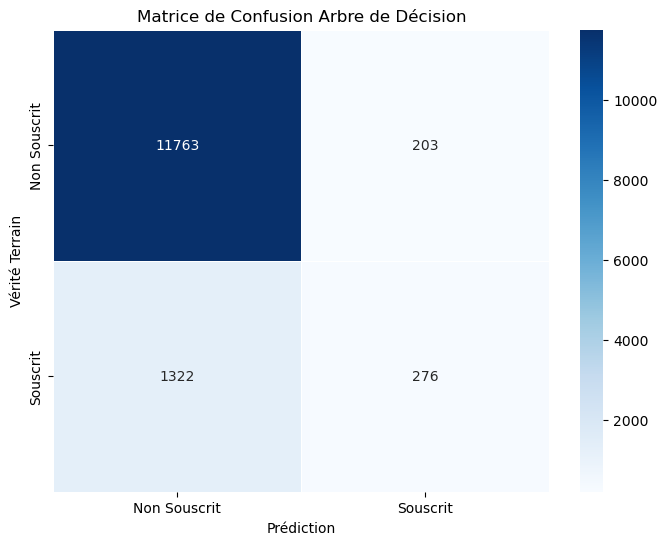

In [35]:
# Calculer la matrice de confusion
cm_dt = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Souscrit', 'Souscrit'], yticklabels=['Non Souscrit', 'Souscrit'], linewidths=0.5)
plt.title('Matrice de Confusion Arbre de Décision')
plt.xlabel('Prédiction')
plt.ylabel('Vérité Terrain')
plt.show()


#### 3.Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
# Créer un modèle Random Forest avec 100 arbres
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Entraîner le modèle avec les données d'entraînement
model_rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [39]:
# Prédire les valeurs pour l'ensemble de test
y_pred_rf = model_rf.predict(X_test)

### Visualisation des Prédictions (Souscription ou Non)

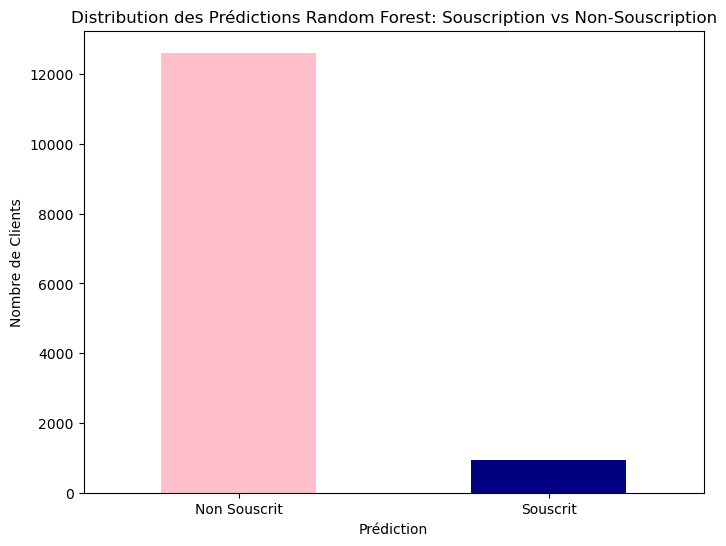

In [41]:
# Compter les prédictions "Souscrit" et "N'a pas souscrit"
prediction_counts_rf = pd.Series(y_pred_rf).value_counts()

# Visualisation avec un diagramme à barres
plt.figure(figsize=(8, 6))
prediction_counts_rf.plot(kind='bar', color=['pink', 'navy'])
plt.title('Distribution des Prédictions Random Forest: Souscription vs Non-Souscription')
plt.xlabel('Prédiction')
plt.ylabel('Nombre de Clients')
plt.xticks([0, 1], ['Non Souscrit', 'Souscrit'], rotation=0)
plt.show()

###  Matrice de Confusion

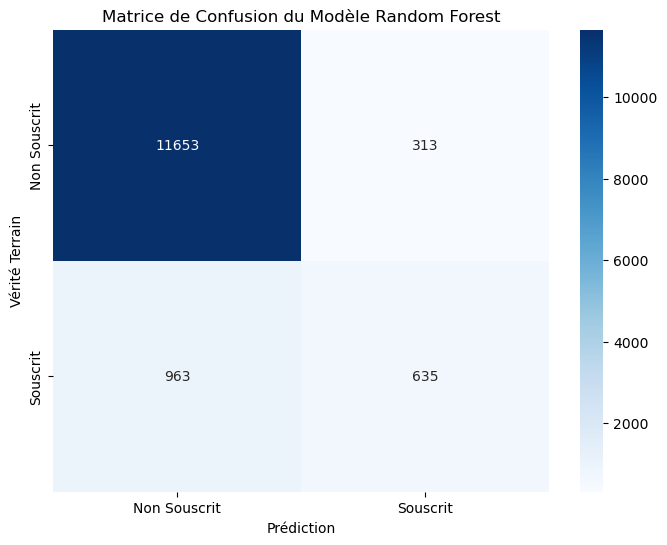

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculer la matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualiser la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Souscrit', 'Souscrit'], yticklabels=['Non Souscrit', 'Souscrit'])
plt.title('Matrice de Confusion du Modèle Random Forest')
plt.xlabel('Prédiction')
plt.ylabel('Vérité Terrain')
plt.show()


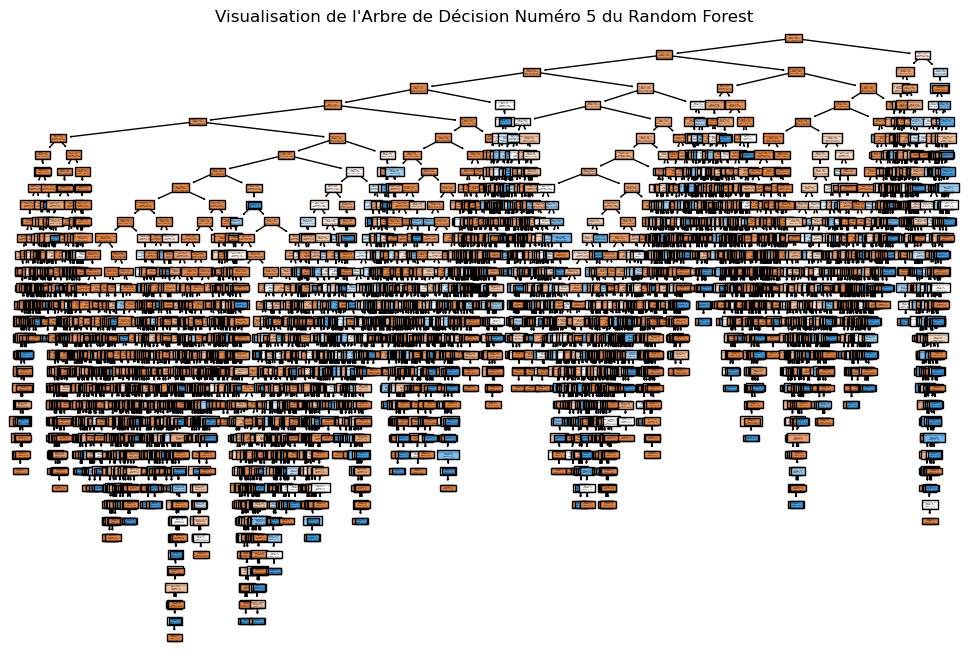

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extraire l'arbre n°5 du modèle Random Forest
estimators = model_rf.estimators_

# Visualisation de l'arbre numéro 5
plt.figure(figsize=(12, 8))
plot_tree(estimators[5], feature_names=X.columns, class_names=['Non Souscrit', 'Souscrit'], filled=True)
plt.title("Visualisation de l'Arbre de Décision Numéro 5 du Random Forest")
plt.show()


## Visualisation des caractéristiques numériques : Histogrammes, Scatterplots

### Histogrammes :

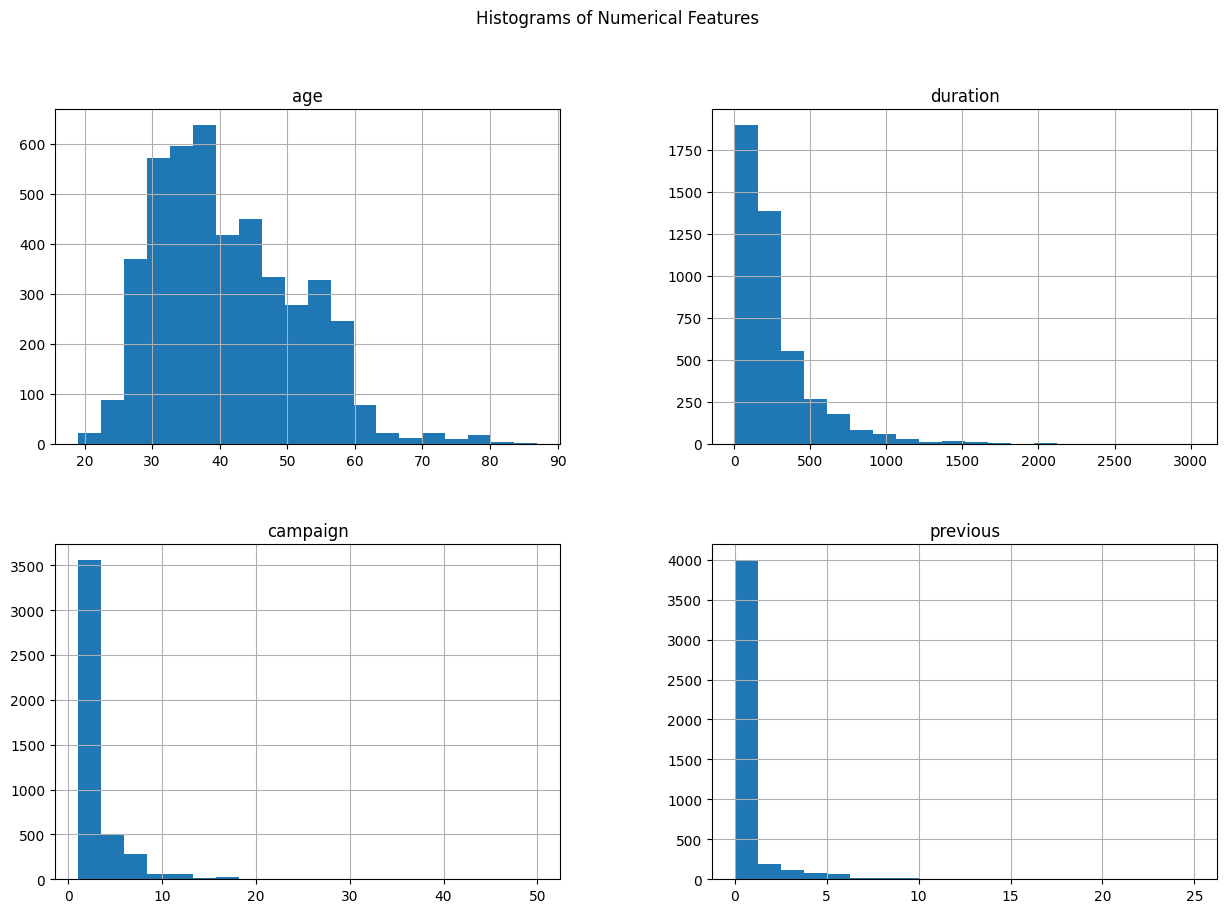

In [105]:

numerical_features = ['age', 'duration', 'campaign', 'previous']  # Exemple
X[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


### Scatterplots :

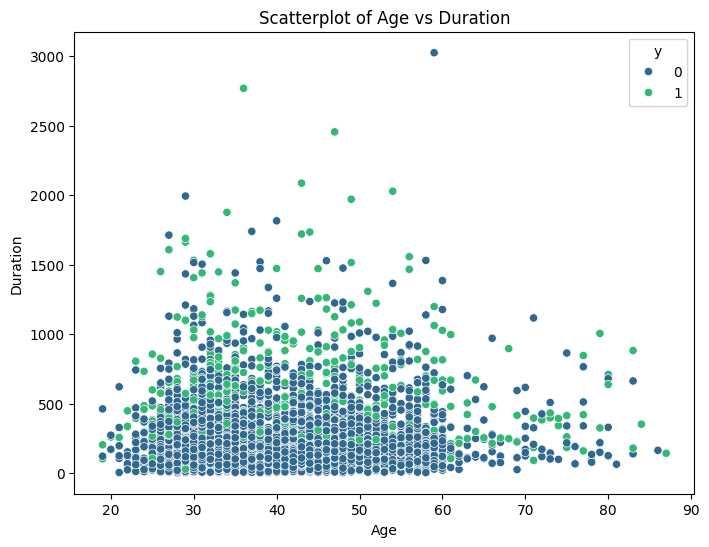

In [107]:
# Exemple de scatterplot entre 'age' et 'duration'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['age'], y=X['duration'], hue=y, palette='viridis')
plt.title('Scatterplot of Age vs Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()


#### Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

# Initialiser et entraîner le modèle Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1205
           1       0.42      0.44      0.43       152

    accuracy                           0.87      1357
   macro avg       0.68      0.68      0.68      1357
weighted avg       0.87      0.87      0.87      1357



### Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialiser et entraîner le modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.58      0.22      0.32       152

    accuracy                           0.89      1357
   macro avg       0.74      0.60      0.63      1357
weighted avg       0.87      0.89      0.87      1357

